In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob, os
import numpy as np
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import Sequence
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

(17931, 96, 96) (6000, 3)


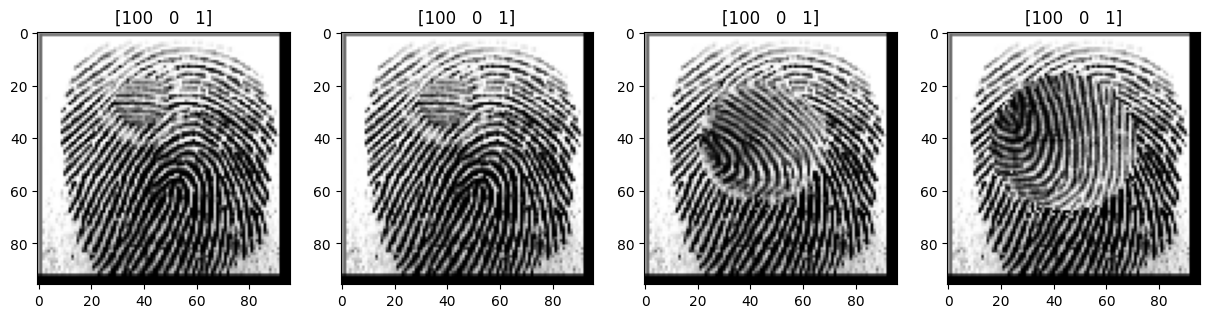

In [2]:
x_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_medium.npz')['data']
x_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_hard.npz')['data']
y_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_real.npy')
y_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_easy.npy')
y_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_medium.npy')
y_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)

plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)

plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)

plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)

plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')


C:\Users\h4uh4\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


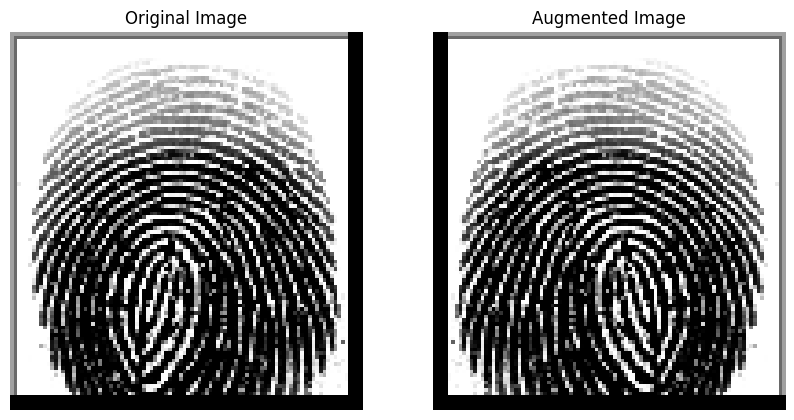

In [ ]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A


image = cv2.imread('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/Real/1__M_Left_index_finger.BMP')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Affine(scale=(0.9, 1.1), translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, rotate=(-5, 5), p=0.7),



])






augmented = augment(image=image)
augmented_image = augmented['image']


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image)
plt.axis('off')

plt.show()


In [ ]:

x_real = x_real[:len(y_real)]


x_data = np.concatenate([x_real, x_easy, x_medium, x_hard], axis=0)
y_data = np.concatenate([y_real, y_easy, y_medium, y_hard], axis=0)

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")


half_size = len(x_data) // 2

x_data_half = x_data[:half_size]
y_data_half = y_data[:half_size]

print(f"x_data_half shape: {x_data_half.shape}")
print(f"y_data_half shape: {y_data_half.shape}")



assert x_data_half.shape[0] == y_data_half.shape[0], "Jumlah sample x_data dan y_data tidak sama!"


x_temp, x_test, y_temp, y_test = train_test_split(x_data_half, y_data_half, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


print(f"Train set size: {x_train.shape[0]} samples")
print(f"Validation set size: {x_val.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")


x_data shape: (55270, 96, 96)
y_data shape: (55270, 3)
x_data_half shape: (27635, 96, 96)
y_data_half shape: (27635, 3)
Train set size: 16581 samples
Validation set size: 5527 samples
Test set size: 5527 samples


In [ ]:

print("Memeriksa dataset raw untuk NaN atau Inf...")

if np.any(np.isnan(x_data_half)) or np.any(np.isinf(x_data_half)):
    print("NaN atau Inf terdeteksi pada dataset raw!")
else:
    print("Dataset raw bersih dari NaN atau Inf.")


Memeriksa dataset raw untuk NaN atau Inf...
Dataset raw bersih dari NaN atau Inf.


In [ ]:

x_train = np.expand_dims(x_train, -1).astype('float32') / 255.
x_val = np.expand_dims(x_val, -1).astype('float32') / 255.
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.


Memory usage: 72.7%
Memory usage: 72.6%


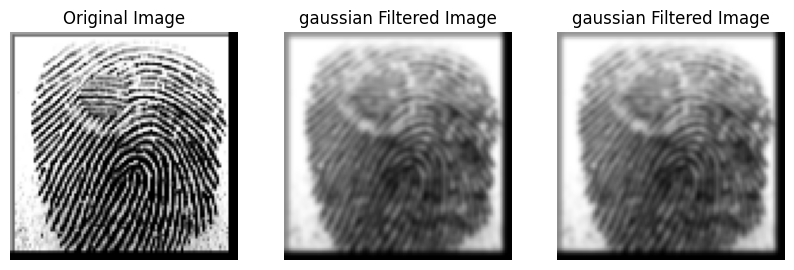

In [ ]:
import cv2
import numpy as np
import psutil
import matplotlib.pyplot as plt


def apply_gaussian_filter(image):

    return cv2.GaussianBlur(image, (5, 5), 0)


x_train_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_train])
x_val_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_val])
x_test_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_test])


print(f"Memory usage: {psutil.virtual_memory().percent}%")


print(f"Memory usage: {psutil.virtual_memory().percent}%")


plt.figure(figsize=(10, 5))


plt.subplot(1, 3, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(x_train_gaussian[0], cmap='gray')
plt.title("gaussian Filtered Image")
plt.axis('off')


plt.subplot(1, 3, 3)
gaussian_result = apply_gaussian_filter(x_train[0])
plt.imshow(gaussian_result, cmap='gray')
plt.title("gaussian Filtered Image")
plt.axis('off')

plt.show()


In [ ]:
import gc


gc.collect()


7300

In [ ]:

x_train_gaussian = np.nan_to_num(x_train_gaussian)
x_val_gaussian = np.nan_to_num(x_val_gaussian)
x_test_gaussian = np.nan_to_num(x_test_gaussian)


x_train_gaussian = np.expand_dims(x_train_gaussian, -1).astype('float32') / np.max(x_train_gaussian)
x_val_gaussian = np.expand_dims(x_val_gaussian, -1).astype('float32') / np.max(x_val_gaussian)
x_test_gaussian = np.expand_dims(x_test_gaussian, -1).astype('float32') / np.max(x_test_gaussian)


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.utils import Sequence


def ensure_rgb(image):
    if image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)
    return image


x_train_gaussian_rgb = np.array([ensure_rgb(img) for img in x_train_gaussian])


class PairGenerator(Sequence):
    def __init__(self, x, y, x_real, y_real, batch_size=32, augment_fn=None):
        self.x = x
        self.y = y
        self.x_real = x_real
        self.y_real = y_real
        self.batch_size = batch_size
        self.augment_fn = augment_fn


        self.label_real_dict = {}
        for idx, label in enumerate(self.y_real):
            key = ''.join(label.astype(str)).zfill(6)
            if key not in self.label_real_dict:
                self.label_real_dict[key] = []
            self.label_real_dict[key].append(idx)

        self.label_keys = list(self.label_real_dict.keys())

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, len(self.x))


        x1_batch = np.empty((end - start, 96, 96, 3), dtype=np.float32)
        x2_batch = np.empty((end - start, 96, 96, 3), dtype=np.float32)
        y_batch = self.y[start:end]
        batch_size = len(x1_batch)

        labels = np.zeros((batch_size, 1), dtype=np.float32)

        for i, label in enumerate(y_batch):
            key = ''.join(label.astype(str)).zfill(6)

            if random.random() > 0.5 and key in self.label_real_dict:
                idx = random.choice(self.label_real_dict[key])
                x2 = self.x_real[idx]
                labels[i] = 1.
            else:
                while True:
                    unmatch_key = random.choice(self.label_keys)
                    if unmatch_key != key:
                        idx = random.choice(self.label_real_dict[unmatch_key])
                        x2 = self.x_real[idx]
                        break
                labels[i] = 0.

            x2_batch[i] = x2


            x1_batch[i] = self.x[start + i]
            x2_batch[i] = x2


            if self.augment_fn:

                if isinstance(x1_batch[i], np.ndarray):
                    x1_batch[i] = self.augment_fn(image=x1_batch[i])['image']
                elif isinstance(x1_batch[i], tf.Tensor):
                    x1_batch[i] = self.augment_fn(image=x1_batch[i].numpy())['image']
                
                if isinstance(x2_batch[i], np.ndarray):
                    x2_batch[i] = self.augment_fn(image=x2_batch[i])['image']
                elif isinstance(x2_batch[i], tf.Tensor):
                    x2_batch[i] = self.augment_fn(image=x2_batch[i].numpy())['image']

        return (x1_batch, x2_batch), labels


Shape of first image after RGB conversion: (96, 96, 3)


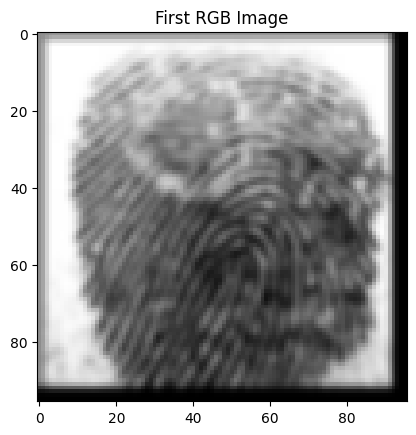

In [ ]:
import numpy as np


def ensure_rgb(image):
    if image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)
    return image


x_train_gaussian_rgb = np.array([ensure_rgb(img) for img in x_train_gaussian])


print("Shape of first image after RGB conversion:", x_train_gaussian_rgb[0].shape)


import matplotlib.pyplot as plt
plt.imshow(x_train_gaussian_rgb[0])
plt.title('First RGB Image')
plt.show()


Image 0 shape: (96, 96, 3)
Image 1 shape: (96, 96, 3)
Image 2 shape: (96, 96, 3)
Image 3 shape: (96, 96, 3)
Image 4 shape: (96, 96, 3)
Image 0 min value: 0.0
Image 0 max value: 1.0
Image 1 min value: 0.0
Image 1 max value: 1.0
Image 2 min value: 0.0
Image 2 max value: 1.0
Image 3 min value: 0.0
Image 3 max value: 1.0
Image 4 min value: 0.0
Image 4 max value: 1.0


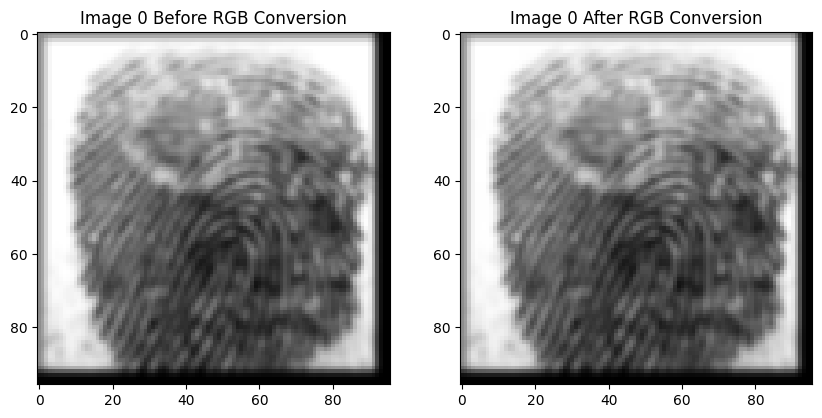

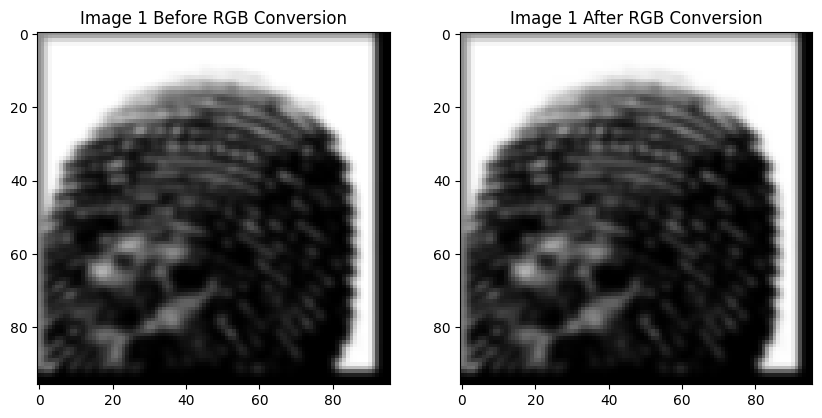

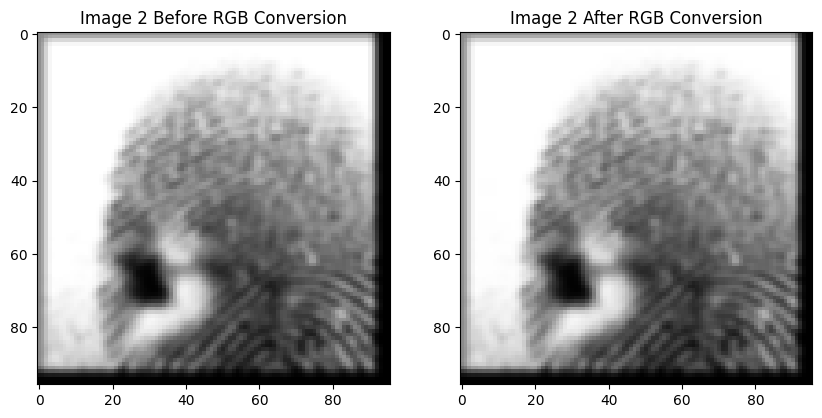

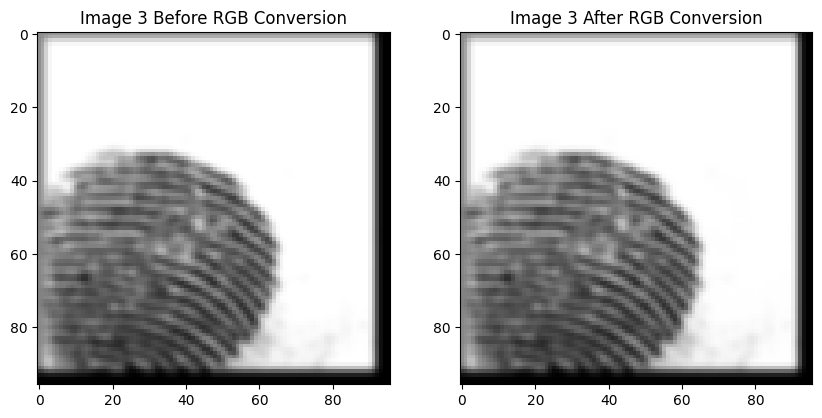

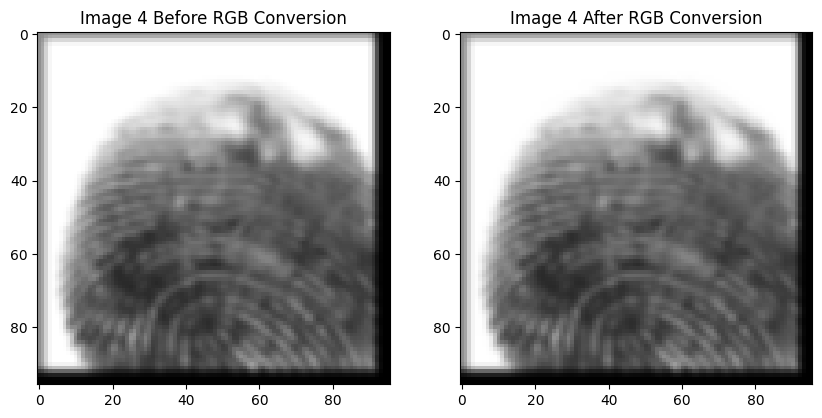

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


for i in range(5):
    print(f"Image {i} shape:", x_train_gaussian_rgb[i].shape)


for i in range(5):
    print(f"Image {i} min value:", np.min(x_train_gaussian_rgb[i]))
    print(f"Image {i} max value:", np.max(x_train_gaussian_rgb[i]))


for i in range(5):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    if x_train_gaussian[i].shape[-1] == 1:
        plt.imshow(x_train_gaussian[i].squeeze(), cmap='gray')
    else:
        plt.imshow(x_train_gaussian[i])
    plt.title(f'Image {i} Before RGB Conversion')


    rgb_image = ensure_rgb(x_train_gaussian[i])

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_image)
    plt.title(f'Image {i} After RGB Conversion')

    plt.show()


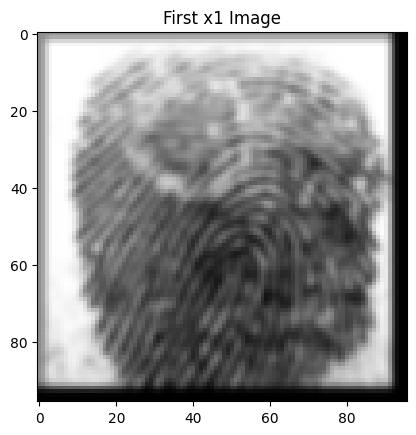

In [ ]:

plt.imshow(x_train_gaussian_rgb[0])
plt.title('First x1 Image')
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models


def build_vgg19_model(input_shape=(96, 96, 3)):

    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in base_model.layers:
        layer.trainable = False
    

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)


    model = models.Model(inputs=base_model.input, outputs=output)

    return model


x1 = layers.Input(shape=(96, 96, 3))
x2 = layers.Input(shape=(96, 96, 3))


vgg_model = build_vgg19_model()


f1 = vgg_model(x1)
f2 = vgg_model(x2)


diff = layers.Subtract()([f1, f2])


x = layers.Dense(128, activation='relu')(diff)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)


model = models.Model(inputs=[x1, x2], outputs=output)


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 1)         │ 20,622,657 │ input_layer[0][0… │
│ (Functional)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 1)         │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │        256 │ subtract[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,631,234 (78.70 MB)

 Trainable params: 606,850 (2.31 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_gaussian_rgb)) or np.any(np.isinf(x_train_gaussian_rgb)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [16]:
train_gen = PairGenerator(x_train_gaussian_rgb, y_train, x_train_gaussian_rgb, y_train, batch_size=32, augment_fn=augment)
val_gen = PairGenerator(x_val, y_val, x_val, y_val, batch_size=32, augment_fn=None)


In [ ]:

print(f"NaN atau Inf terdeteksi pada x_train_gaussian setelah filter gaussian: {np.any(np.isnan(x_train_gaussian_rgb)) or np.any(np.isinf(x_train_gaussian_rgb))}")


print(f"NaN atau Inf terdeteksi pada x_val_gaussian setelah filter gaussian: {np.any(np.isnan(x_val_gaussian)) or np.any(np.isinf(x_val_gaussian))}")
print(f"NaN atau Inf terdeteksi pada x_test_gaussian setelah filter gaussian: {np.any(np.isnan(x_test_gaussian)) or np.any(np.isinf(x_test_gaussian))}")


NaN atau Inf terdeteksi pada x_train_gaussian setelah filter gaussian: False
NaN atau Inf terdeteksi pada x_val_gaussian setelah filter gaussian: False
NaN atau Inf terdeteksi pada x_test_gaussian setelah filter gaussian: False


In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('gaussian_vgg19_best.h5', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[checkpoint, early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/5


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


519/519 - 598s - 1s/step - accuracy: 0.6719 - auc: 0.7239 - loss: 0.6207 - val_accuracy: 0.6843 - val_auc: 0.8947 - val_loss: 0.5757 - learning_rate: 1.0000e-03
Epoch 2/5


519/519 - 586s - 1s/step - accuracy: 0.7067 - auc: 0.7597 - loss: 0.5926 - val_accuracy: 0.7141 - val_auc: 0.8851 - val_loss: 0.5521 - learning_rate: 1.0000e-03
Epoch 3/5
519/519 - 588s - 1s/step - accuracy: 0.7215 - auc: 0.7695 - loss: 0.5814 - val_accuracy: 0.6383 - val_auc: 0.8787 - val_loss: 0.6231 - learning_rate: 1.0000e-03
Epoch 4/5
519/519 - 584s - 1s/step - accuracy: 0.7307 - auc: 0.7785 - loss: 0.5682 - val_accuracy: 0.6834 - val_auc: 0.8936 - val_loss: 0.5866 - learning_rate: 1.0000e-03
Epoch 5/5


519/519 - 584s - 1s/step - accuracy: 0.7381 - auc: 0.7856 - loss: 0.5587 - val_accuracy: 0.7637 - val_auc: 0.9069 - val_loss: 0.4988 - learning_rate: 1.0000e-03


In [ ]:

model.save('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_VGG/HasilVGG/gaussian_vgg19_final_model.keras')



173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 837ms/step - accuracy: 0.8271 - auc: 0.9088 - loss: 0.4430
Test Loss: 0.4418748617172241
Test Accuracy: 0.8244979381561279
Test AUC: 0.9127563238143921


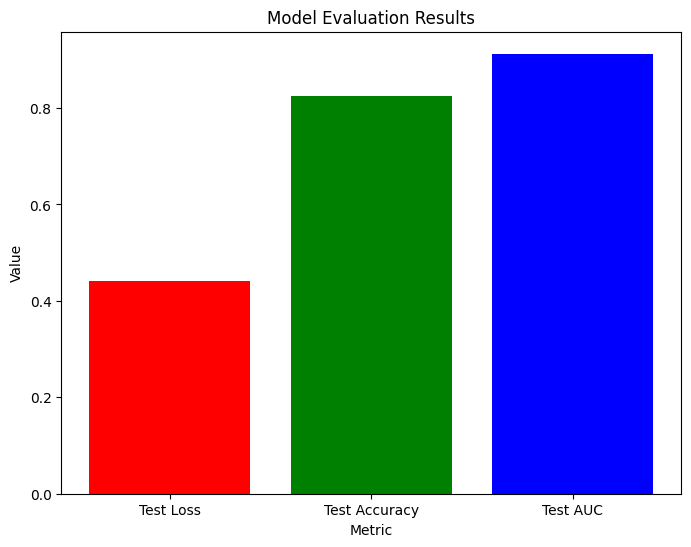

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

test_gen = PairGenerator(x_test_gaussian, y_test, x_test_gaussian, y_test, batch_size=32, augment_fn=None)


test_loss, test_accuracy, test_auc = model.evaluate(test_gen)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


results = [test_loss, test_accuracy, test_auc]
labels = ['Test Loss', 'Test Accuracy', 'Test AUC']


plt.figure(figsize=(8, 6))
plt.bar(labels, results, color=['red', 'green', 'blue'])


plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Results')


plt.show()


Shapes: (5527, 96, 96, 3) (5527, 96, 96, 3) (5527, 1)


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
  0%|          | 0/100 [00:00<?, ?it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


  1%|          | 1/100 [02:26<4:02:11, 146.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 830ms/step


  2%|▏         | 2/100 [04:51<3:57:30, 145.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 828ms/step


  3%|▎         | 3/100 [07:15<3:54:05, 144.80s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 834ms/step


  4%|▍         | 4/100 [09:40<3:51:47, 144.87s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 828ms/step


  5%|▌         | 5/100 [12:04<3:48:49, 144.52s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 827ms/step


  6%|▌         | 6/100 [14:27<3:46:01, 144.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 827ms/step


  7%|▋         | 7/100 [16:51<3:43:21, 144.10s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step


  8%|▊         | 8/100 [19:15<3:40:55, 144.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 831ms/step


  9%|▉         | 9/100 [21:40<3:38:37, 144.15s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 832ms/step


 10%|█         | 10/100 [24:04<3:36:26, 144.29s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 834ms/step


 11%|█         | 11/100 [26:29<3:34:16, 144.46s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step


 12%|█▏        | 12/100 [28:53<3:31:40, 144.33s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 832ms/step


 13%|█▎        | 13/100 [31:17<3:29:19, 144.36s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 831ms/step


 14%|█▍        | 14/100 [33:42<3:26:54, 144.36s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 833ms/step


 15%|█▌        | 15/100 [36:06<3:24:37, 144.44s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 833ms/step


 16%|█▌        | 16/100 [38:31<3:22:20, 144.53s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 837ms/step


 17%|█▋        | 17/100 [40:57<3:20:16, 144.77s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 836ms/step


 18%|█▊        | 18/100 [43:22<3:18:02, 144.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 833ms/step


 19%|█▉        | 19/100 [45:46<3:15:31, 144.84s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 834ms/step


 20%|██        | 20/100 [48:11<3:13:06, 144.84s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 21%|██        | 21/100 [50:37<3:11:10, 145.20s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 843ms/step


 22%|██▏       | 22/100 [53:04<3:09:16, 145.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 849ms/step


 23%|██▎       | 23/100 [55:31<3:07:33, 146.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 846ms/step


 24%|██▍       | 24/100 [57:58<3:05:26, 146.40s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 148s 857ms/step


 25%|██▌       | 25/100 [1:00:27<3:03:54, 147.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 850ms/step


 26%|██▌       | 26/100 [1:02:55<3:01:38, 147.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 848ms/step


 27%|██▋       | 27/100 [1:05:22<2:59:09, 147.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 28%|██▊       | 28/100 [1:07:49<2:56:40, 147.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 852ms/step


 29%|██▉       | 29/100 [1:10:17<2:54:28, 147.44s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 846ms/step


 30%|███       | 30/100 [1:12:44<2:51:51, 147.31s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 31%|███       | 31/100 [1:15:11<2:49:08, 147.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 32%|███▏      | 32/100 [1:17:37<2:46:31, 146.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 846ms/step


 33%|███▎      | 33/100 [1:20:04<2:44:02, 146.91s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 34%|███▍      | 34/100 [1:22:31<2:41:40, 146.97s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 848ms/step


 35%|███▌      | 35/100 [1:24:58<2:39:19, 147.07s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 851ms/step


 36%|███▌      | 36/100 [1:27:26<2:37:07, 147.30s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 850ms/step


 37%|███▋      | 37/100 [1:29:54<2:34:45, 147.39s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 849ms/step


 38%|███▊      | 38/100 [1:32:21<2:32:21, 147.44s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 148s 857ms/step


 39%|███▉      | 39/100 [1:34:50<2:30:19, 147.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 148s 853ms/step


 40%|████      | 40/100 [1:37:18<2:27:57, 147.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 850ms/step


 41%|████      | 41/100 [1:39:46<2:25:22, 147.84s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 148s 852ms/step


 42%|████▏     | 42/100 [1:42:14<2:22:58, 147.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 850ms/step


 43%|████▎     | 43/100 [1:44:42<2:20:27, 147.84s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 851ms/step


 44%|████▍     | 44/100 [1:47:10<2:17:59, 147.85s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 848ms/step


 45%|████▌     | 45/100 [1:49:37<2:15:22, 147.69s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 46%|████▌     | 46/100 [1:52:04<2:12:46, 147.52s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 848ms/step


 47%|████▋     | 47/100 [1:54:31<2:10:14, 147.45s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 851ms/step


 48%|████▊     | 48/100 [1:56:59<2:07:52, 147.55s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 845ms/step


 49%|████▉     | 49/100 [1:59:26<2:05:12, 147.31s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 50%|█████     | 50/100 [2:01:53<2:02:43, 147.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 51%|█████     | 51/100 [2:04:20<2:00:06, 147.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 52%|█████▏    | 52/100 [2:06:46<1:57:25, 146.79s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 836ms/step


 53%|█████▎    | 53/100 [2:09:11<1:54:37, 146.32s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 839ms/step


 54%|█████▍    | 54/100 [2:11:37<1:52:03, 146.17s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 832ms/step


 55%|█████▌    | 55/100 [2:14:01<1:49:16, 145.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 835ms/step


 56%|█████▌    | 56/100 [2:16:26<1:46:41, 145.49s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 833ms/step


 57%|█████▋    | 57/100 [2:18:51<1:44:06, 145.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 835ms/step


 58%|█████▊    | 58/100 [2:21:16<1:41:38, 145.20s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 837ms/step


 59%|█████▉    | 59/100 [2:23:42<1:39:15, 145.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 834ms/step


 60%|██████    | 60/100 [2:26:07<1:36:46, 145.16s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 835ms/step


 61%|██████    | 61/100 [2:28:32<1:34:20, 145.13s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 835ms/step


 62%|██████▏   | 62/100 [2:30:57<1:31:53, 145.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 835ms/step


 63%|██████▎   | 63/100 [2:33:22<1:29:28, 145.09s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 64%|██████▍   | 64/100 [2:35:48<1:27:19, 145.53s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 149s 859ms/step


 65%|██████▌   | 65/100 [2:38:17<1:25:31, 146.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 838ms/step


 66%|██████▌   | 66/100 [2:40:43<1:22:54, 146.31s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 849ms/step


 67%|██████▋   | 67/100 [2:43:10<1:20:39, 146.65s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 68%|██████▊   | 68/100 [2:45:38<1:18:19, 146.85s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 850ms/step


 69%|██████▉   | 69/100 [2:48:06<1:16:00, 147.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 940ms/step


 70%|███████   | 70/100 [2:50:49<1:15:58, 151.94s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 910ms/step


 71%|███████   | 71/100 [2:53:27<1:14:18, 153.73s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 944ms/step


 72%|███████▏  | 72/100 [2:56:11<1:13:10, 156.82s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 165s 951ms/step


 73%|███████▎  | 73/100 [2:58:56<1:11:42, 159.36s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 171s 988ms/step


 74%|███████▍  | 74/100 [3:01:48<1:10:39, 163.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 942ms/step


 75%|███████▌  | 75/100 [3:04:31<1:08:01, 163.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 921ms/step


 76%|███████▌  | 76/100 [3:07:12<1:04:56, 162.34s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 923ms/step


 77%|███████▋  | 77/100 [3:09:52<1:01:59, 161.73s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 908ms/step


 78%|███████▊  | 78/100 [3:12:30<58:51, 160.54s/it]  

173/173 ━━━━━━━━━━━━━━━━━━━━ 158s 912ms/step


 79%|███████▉  | 79/100 [3:15:08<55:57, 159.89s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 173s 998ms/step


 80%|████████  | 80/100 [3:18:01<54:39, 163.95s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step


 81%|████████  | 81/100 [3:20:56<52:57, 167.21s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 926ms/step


 82%|████████▏ | 82/100 [3:23:37<49:35, 165.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 923ms/step


 83%|████████▎ | 83/100 [3:26:17<46:24, 163.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 926ms/step


 84%|████████▍ | 84/100 [3:28:58<43:26, 162.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 924ms/step


 85%|████████▌ | 85/100 [3:31:39<40:33, 162.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 924ms/step


 86%|████████▌ | 86/100 [3:34:19<37:44, 161.75s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 158s 912ms/step


 87%|████████▋ | 87/100 [3:36:58<34:49, 160.74s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 907ms/step


 88%|████████▊ | 88/100 [3:39:35<31:57, 159.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 906ms/step


 89%|████████▉ | 89/100 [3:42:13<29:09, 159.09s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 161s 929ms/step


 90%|█████████ | 90/100 [3:44:54<26:38, 159.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 839ms/step


 91%|█████████ | 91/100 [3:47:20<23:20, 155.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 142s 819ms/step


 92%|█████████▏| 92/100 [3:49:43<20:13, 151.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 825ms/step


 93%|█████████▎| 93/100 [3:52:06<17:23, 149.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 142s 818ms/step


 94%|█████████▍| 94/100 [3:54:28<14:42, 147.03s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 142s 820ms/step


 95%|█████████▌| 95/100 [3:56:50<12:08, 145.66s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 151s 873ms/step


 96%|█████████▌| 96/100 [3:59:22<09:49, 147.45s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 908ms/step


 97%|█████████▋| 97/100 [4:02:00<07:31, 150.56s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 893ms/step


 98%|█████████▊| 98/100 [4:04:35<05:03, 151.92s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 838ms/step


 99%|█████████▉| 99/100 [4:07:01<02:30, 150.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 836ms/step


100%|██████████| 100/100 [4:09:26<00:00, 149.66s/it]

Bootstrap AUC mean: 0.8458
95% Confidence Interval: [0.8367, 0.8564]
Indices dipilih: [ 0 24 49 74 99]
Nilai AUC diambil: [0.84657995 0.84585225 0.85436248 0.84719836 0.84331324]


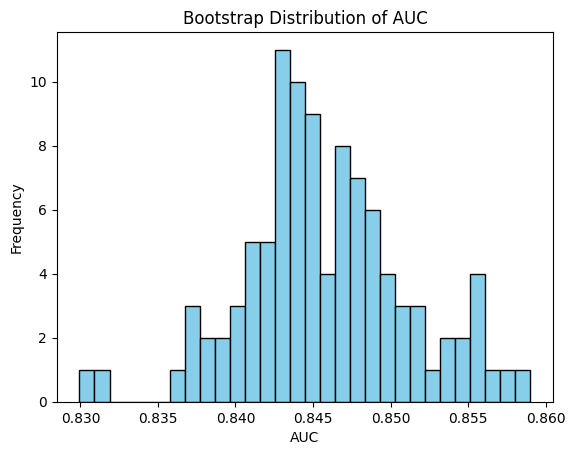

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm


test_gen = PairGenerator(x_test_gaussian, y_test, x_test_gaussian, y_test, batch_size=32, augment_fn=augment)

x1_list, x2_list, y_list = [], [], []
for i in range(len(test_gen)):
    (x1_batch, x2_batch), y_batch = test_gen[i]
    x1_list.append(x1_batch)
    x2_list.append(x2_batch)
    y_list.append(y_batch)

x_test_1 = np.concatenate(x1_list, axis=0)
x_test_2 = np.concatenate(x2_list, axis=0)
y_test_full = np.concatenate(y_list, axis=0)
y_test_full = y_test_full[:len(x_test_1)]

print("Shapes:", x_test_1.shape, x_test_2.shape, y_test_full.shape)


model_local = load_model('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_VGG/HasilVGG/gaussian_vgg19_final_model.keras')

B = 100
n = len(x_test_1)
num_classes = len(np.unique(y_test_full))
results = []

for seed in tqdm(range(B), total=B):
    np.random.seed(seed)
    idx = np.random.choice(n, size=n, replace=True)
    x1_bs, x2_bs, y_bs = x_test_1[idx], x_test_2[idx], y_test_full[idx]

    y_pred_probs = model_local.predict([x1_bs, x2_bs], batch_size=32)
    y_bs_bin = label_binarize(y_bs, classes=range(num_classes))

    auc = roc_auc_score(y_bs_bin, y_pred_probs, multi_class='ovr', average='macro')
    results.append(auc)

auc_scores = np.array(results)
mean_auc = np.mean(auc_scores)
ci_lower, ci_upper = np.percentile(auc_scores, [2.5, 97.5])

print(f"Bootstrap AUC mean: {mean_auc:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


indices = np.linspace(0, len(auc_scores) - 1, 5, dtype=int)
sampled_aucs = auc_scores[indices]

print("Indices dipilih:", indices)
print("Nilai AUC diambil:", sampled_aucs)


with open("sobel_bootstrap_auc_results.txt", "w") as f:
    f.write("Sampled 5 AUC values (berjarak):\n")
    for val in sampled_aucs:
        f.write(f"{val:.6f}\n")
    f.write("\n")
    f.write(f"Bootstrap AUC mean: {mean_auc:.4f}\n")
    f.write(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n\n")
    f.write("All Bootstrap AUC scores:\n")
    for val in auc_scores:
        f.write(f"{val:.6f}\n")


plt.hist(auc_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Distribution of AUC')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.show()
